# Loading Libraries and excel data onto Notebook

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Datasets

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Understanding the dataset

count how many transactions are true = 0, and how many are false = 1

Text(0, 0.5, 'Number of transactions')

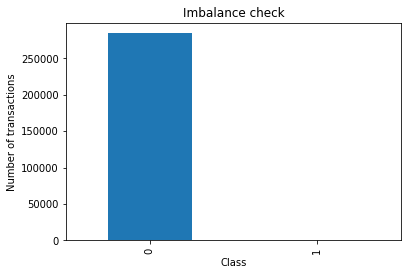

In [4]:

count_class= pd.value_counts(data['Class'], sort = True)
count_class.plot(kind='bar')

plt.title ("Imbalance check")
plt.xlabel ("Class")
plt.ylabel ("Number of transactions")

In [5]:
count_class

0    284315
1       492
Name: Class, dtype: int64

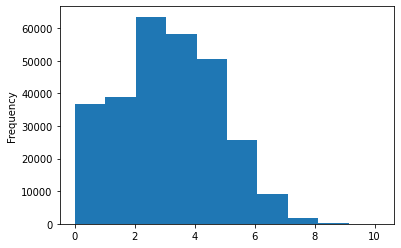

In [6]:
#Normalize the amount column and storing in a new column

data['logAmount'] = np.log(data['Amount']+1)

data['logAmount'].sort_values().plot.hist()

In [7]:
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape (-1,1))
data = data.drop (['Time', 'Amount','logAmount'], axis = 1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   V1          284807 non-null  float64
 1   V2          284807 non-null  float64
 2   V3          284807 non-null  float64
 3   V4          284807 non-null  float64
 4   V5          284807 non-null  float64
 5   V6          284807 non-null  float64
 6   V7          284807 non-null  float64
 7   V8          284807 non-null  float64
 8   V9          284807 non-null  float64
 9   V10         284807 non-null  float64
 10  V11         284807 non-null  float64
 11  V12         284807 non-null  float64
 12  V13         284807 non-null  float64
 13  V14         284807 non-null  float64
 14  V15         284807 non-null  float64
 15  V16         284807 non-null  float64
 16  V17         284807 non-null  float64
 17  V18         284807 non-null  float64
 18  V19         284807 non-null  float64
 19  V2

# Separate the data into two, one containing the X values and the other with the y values

In [9]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']
len(y[y.Class ==1])

492

# Resampling --> for dealing with imblanced datasets

# Undersampling --> Remove the majority class
# Oversampling --> Synthetically replicate minority classes
# - SMOTE --> A combination of the previous two


In [10]:
#Fraudulent cases
number_records_fraud = len(data[data.Class==1])
number_records_non_fraud = len(data[data.Class==0])
#extract fraud and non-fraud
fraud_indices = np.array (data[data.Class==1].index)
normal_indices = np.array (data[data.Class==0].index)

#randomly obtain a number of non-fraud indices, equal to the fraud cases
#random_normal_indices = np.random.choice (normal_indices, number_records_fraud, replace = False )

#randomly obtain a number of fraud indices, equal to the non - fraud cases (majority sample)

random_fraud_indices = np.random.choice (fraud_indices, number_records_non_fraud, replace = True)

#Combine the fraud cases with the random ones
#under_sample_indices = np.concatenate ([fraud_indices, random_normal_indices])

#Combine the random fraud cases with the normal ones
under_sample_indices = np.concatenate ([normal_indices, random_fraud_indices])

#Choose values of indices

under_sample_data = data.iloc[under_sample_indices,:]

#Separate X and Y 
X_undersample = under_sample_data.iloc [:, under_sample_data.columns != 'Class']

y_undersample = under_sample_data.iloc [:, under_sample_data.columns == 'Class']


In [11]:
len(y_undersample)

568630

In [12]:
#Split training and testing dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 0)

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split (X_undersample,y_undersample, test_size = 0.3, random_state = 0)



# Model Building and training

# Model 1: Multi layer perceptron Classifier model

In [13]:
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [14]:
MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)
MLPC.fit(X_train_under, y_train_under)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)

In [15]:
y_pred = MLPC.predict(X_test_under)
recall_acc = recall_score (y_test_under,y_pred)
recall_acc

1.0

In [16]:
ReportMLPC = classification_report(y_test_under,y_pred)

print(ReportMLPC)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85158
           1       1.00      1.00      1.00     85431

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



Text(33.0, 0.5, 'True class')

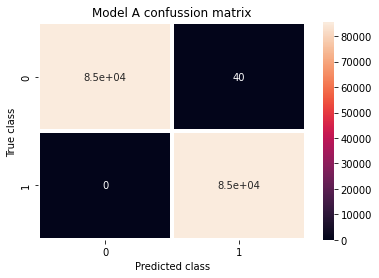

In [17]:
import seaborn as sns 

matrix = confusion_matrix(y_test_under,y_pred)
sns.heatmap(matrix, annot=True, linewidths=3)
plt.title('Model A confussion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')

# Model 2: Suppport Vector Machine (SVM)  

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score

clf_svm = SVC(kernel='rbf', gamma = 0.0001, C=1e1)

clf_svm.fit(X_train_under, y_train_under)

y_SVMpred = clf_svm.predict(X_test_under)

print('Accuracy of SVM is:', accuracy_score(y_test_under, y_SVMpred))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVM is: 0.9536136562146446


In [19]:
ReportSVM = classification_report(y_test_under,y_SVMpred)

print(ReportSVM)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     85158
           1       0.98      0.92      0.95     85431

    accuracy                           0.95    170589
   macro avg       0.96      0.95      0.95    170589
weighted avg       0.96      0.95      0.95    170589



Text(33.0, 0.5, 'True class')

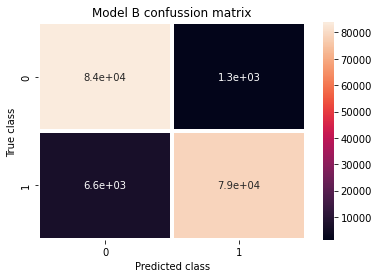

In [20]:
import seaborn as sns 

matrixA = confusion_matrix(y_test_under,y_SVMpred)
sns.heatmap(matrixA, annot=True, linewidths=3)
plt.title('Model B confussion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')

# Model 3: Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_under, y_train_under)

y_RFpred = clf.predict(X_test_under)
print('Accuracy of RandomForest is:', accuracy_score(y_test_under, y_RFpred))

<ipython-input-21-671ed564f1d4>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_under, y_train_under)


Accuracy of RandomForest is: 0.9999296554877513


In [22]:
ReportRF = classification_report(y_test_under,y_RFpred)

print(ReportRF)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85158
           1       1.00      1.00      1.00     85431

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



Text(33.0, 0.5, 'True class')

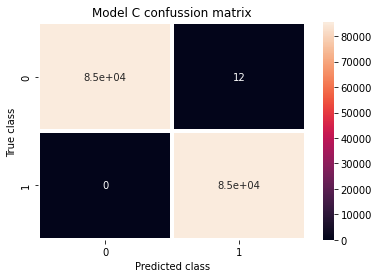

In [23]:
matrixB = confusion_matrix(y_test_under,y_RFpred)
sns.heatmap(matrixB, annot=True, linewidths=3)
plt.title('Model C confussion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')